### Plot EAI
Here, we define a stand-alone function for plotting the EAI from the CCDR notebook.

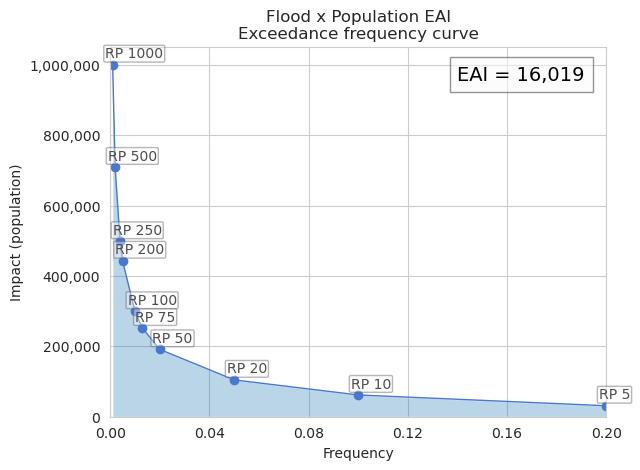

In [152]:
# Importing the required libraries
import datetime, os, shutil, gc, socket
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import seaborn as sns

# Reading the data for plotting
dfData = pd.read_csv('NGA_RSKv2.csv') 

# Defining the title and sub-title
title    = 'Flood x Population EAI'
subtitle = 'Exceedance frequency curve'

# Defining the x- and y-axis data and text
x  = dfData[['Freq']].values.squeeze()
y  = dfData[['Pop_impact']].values.squeeze()
xlbl = 'Frequency'
ylbl = 'Impact (population)'

# Defining if plotting total EAI
txtTotal = True
xpos = 0.70
totEAI = np.sum(dfData[['Pop_EAI']].values.squeeze())

# Defining the plot style
sns.set_style('whitegrid')
blue, = sns.color_palette('muted', 1)
xFreqAsRP = True
yOnRight = False

# Getting the labels for RPs
rp_lbl = dfData[['RP']].values.squeeze().tolist()
rp_lbl = ['RP '+str(item) for item in rp_lbl]
x_offset = -0.003
y_offset = 20000
if yOnRight: x_offset = -1*x_offset
 
# Creating the plot
fig, ax = plt.subplots()
ax.plot(x, y, color=blue, lw=1, marker="o")
if xFreqAsRP:
    for i in range(len(rp_lbl)):
        ax.text(x[i]+x_offset, y[i]+y_offset, rp_lbl[i], color='#4D4D4D',
                bbox=dict(facecolor='#FAFAFA', edgecolor='#4D4D4D', boxstyle='round,pad=0.1', alpha=0.4))
ax.fill_between(x, 0, y, alpha=.3)
ax.set(xlim=(0, max(x)), ylim=(0, max(y)*1.05), xticks=np.linspace(0, max(x), 6))
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.set_xlabel(xlbl)
ax.set_ylabel(ylbl)
ax.set_title(str(title+'\n'+subtitle))
if yOnRight:
    ax.invert_xaxis()
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
if txtTotal:
    vtext = 'EAI = '+'{:,}'.format(totEAI)
    if yOnRight: xpos = 0.04
    ax.text(xpos, 0.9, vtext, fontsize=14, color='black', ha='left', va='bottom', transform=plt.gca().transAxes, 
            bbox=dict(facecolor='#FAFAFA', edgecolor='#4D4D4D', boxstyle='square,pad=0.4', alpha=0.6));

# Show the graph
plt.show()